In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
RANDOM_SEED = 6

In [3]:
train = pd.read_csv('./aug_train.csv')
test = pd.read_csv('./aug_test.csv')

In [4]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Histograms

In [6]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

C:\Users\ahmet\AppData\Local\Temp\ipykernel_1248\1733652230.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


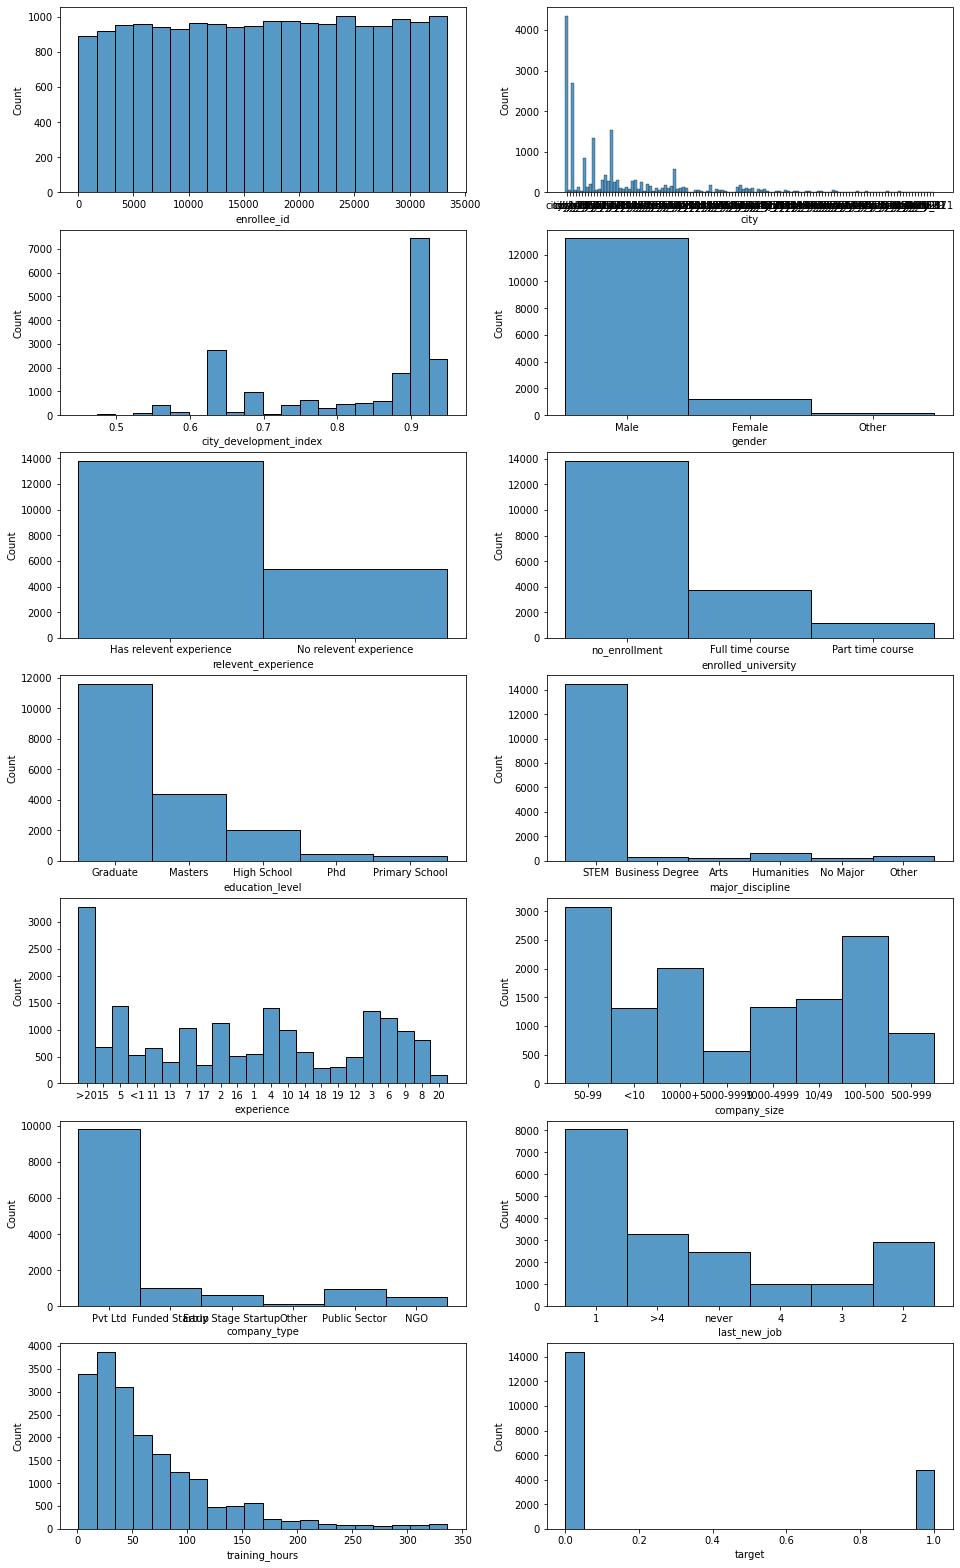

In [7]:
fig, ax = plt.subplots(int(len(train.columns)/2), 2, figsize=(16,len(train.columns)*2))
counter = 0
for i in train.columns:
    sns.histplot(data=train, x=i, bins=20, ax=ax[int(counter/2),counter%2])
    counter +=1 
fig.show()

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

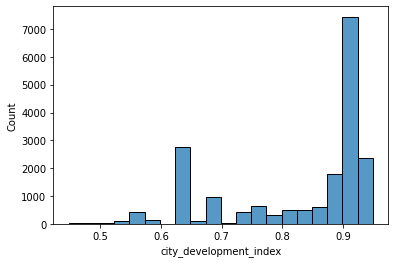

In [8]:
sns.histplot(data=train, x='city_development_index', bins=20)

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

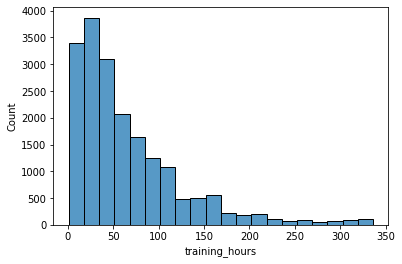

In [9]:
sns.histplot(data=train, x='training_hours', bins=20)

### Categorical Features and Target Comparison

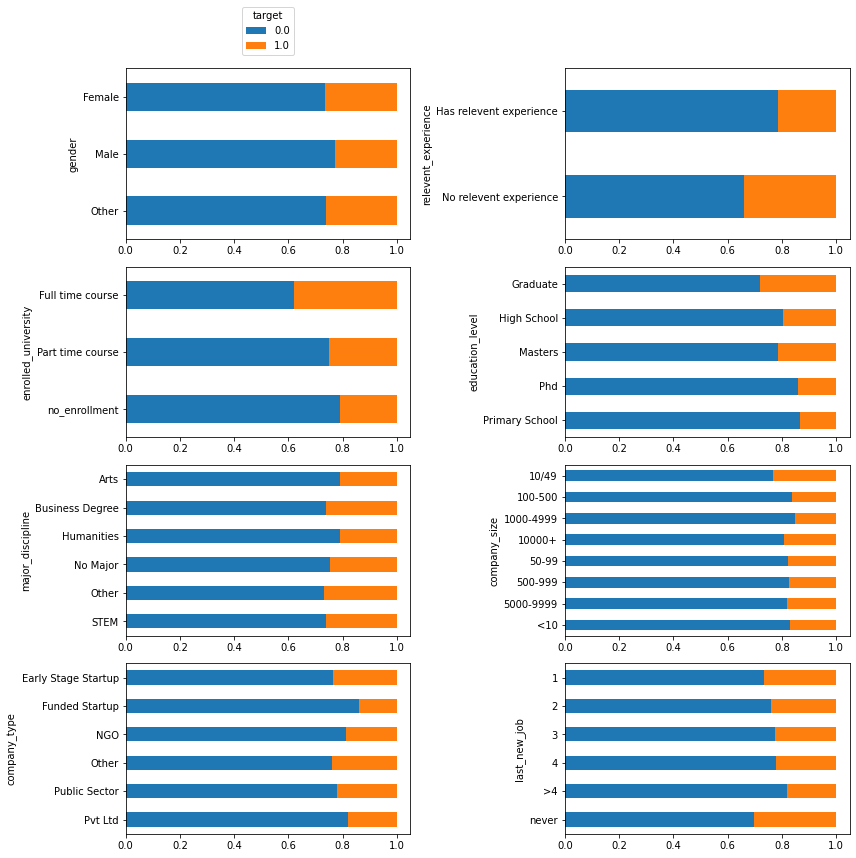

In [10]:
# We add a categorical value columns
cols_to_plot = [
    'gender',
    'relevent_experience',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_size',
    'company_type',
    'last_new_job']

fig, ax = plt.subplots(int(len(cols_to_plot)/2), 2, figsize=(12,len(cols_to_plot)*(1.5)))
for idx, col in enumerate(cols_to_plot):
    rowIndex = int(idx/2)
    colIndex = idx % 2
    counts = (train[['target', col]].groupby(['target', col]).size().unstack('target'))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    props.plot(kind="barh", stacked=True, ax=ax[rowIndex, colIndex])
    ax[rowIndex, colIndex].invert_yaxis()
    ax[rowIndex, colIndex].legend().remove()
    
ax[0, 0].legend( loc='lower center', bbox_to_anchor=(0.5, 1.05), title='target')
fig.tight_layout()

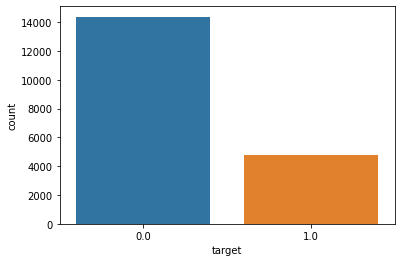

In [11]:
sns.countplot(x=train.target, data=train);

### Correlation Matrix

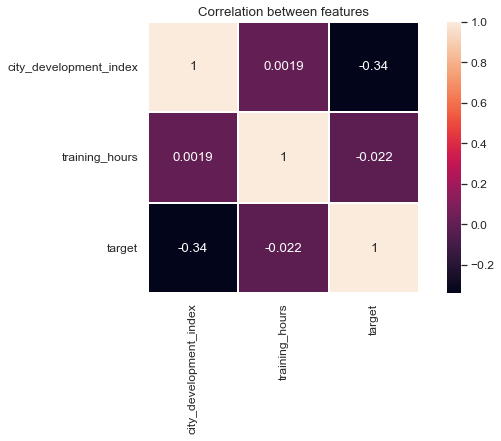

In [12]:
corrMatrix=train[["city_development_index","training_hours","target"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 5))
sns.heatmap(corrMatrix, linewidths=0.01,square=True,annot=True)
plt.title('Correlation between features');

### Analysis of Data Distribution

##### Categorical Values Analysis

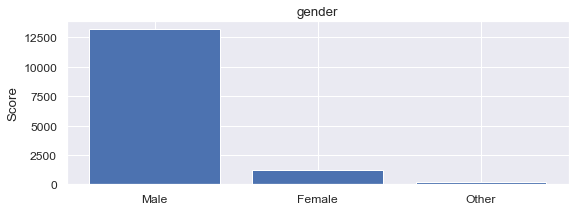

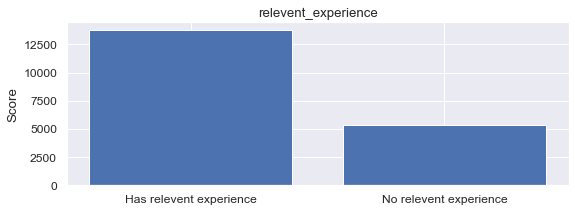

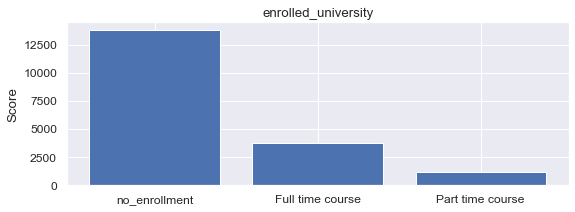

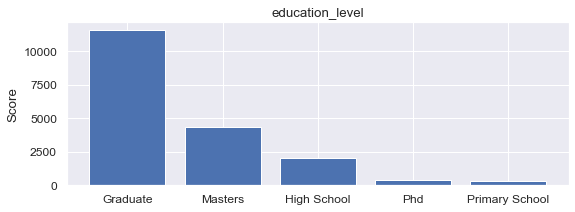

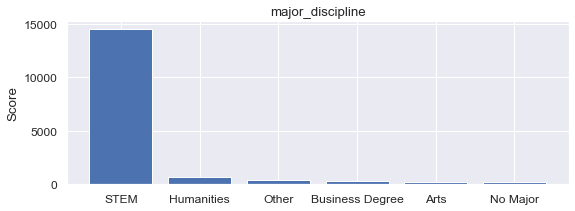

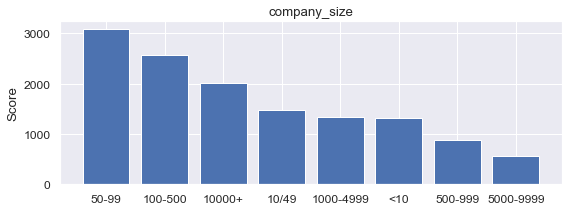

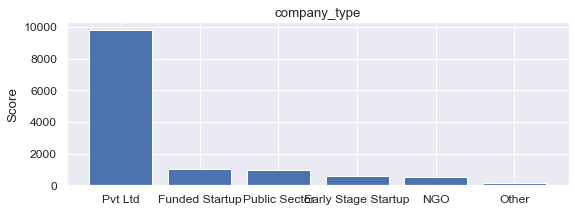

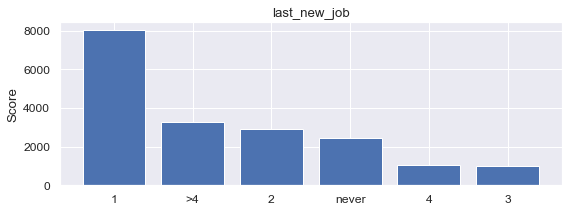

In [13]:
variable = cols_to_plot
for c in cols_to_plot:
    var = train[c]
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.ylabel("Score")
    plt.title(c)
    plt.show()

##### Finding Missing Values

In [14]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [15]:
null_cols = train.isnull().sum()
list(train.columns[null_cols>0])

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [16]:
# train = pd.get_dummies(train, columns = ['gender'])

In [17]:
train.drop('enrollee_id', inplace=True, axis=1)
test.drop('enrollee_id', inplace=True, axis=1)

In [18]:
# target = train.target
# train.drop('target', inplace=True, axis=1)

In [19]:
# train.assign(target=target)

In [20]:
train.columns[:-1]

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [21]:
encoder = LabelEncoder()

for column in train.columns[:-1]:
    #retains only non-null values
    train_data_nonulls = np.array(train[column].dropna())
    test_data_nonulls = np.array(test[column].dropna())    
    #reshapes the data for encoding
    train_impute_reshape = train_data_nonulls.reshape(-1,1)
    test_impute_reshape = test_data_nonulls.reshape(-1,1)
    #encode date
    train_impute_ordinal = encoder.fit_transform(train_impute_reshape)
    test_impute_ordinal = encoder.transform(test_impute_reshape)
    #Assign back encoded values to non-null values
    train[column].loc[train[column].notnull()] = np.squeeze(train_impute_ordinal)
    test[column].loc[test[column].notnull()] = np.squeeze(test_impute_ordinal)

c:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ahmet\AppData\Local\Temp\ipykernel_1248\3914029518.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column].loc[train[column].notnull()] = np.squeeze(train_impute_ordinal)
C:\Users\ahmet\AppData\L

In [22]:
for i in range(95):
    cond = train['city'] == i
    if (train['city'] == i).sum() < 200:
        train.loc[cond,'city'] = 200

*   I will consider null values and fill them with mean or random numbers
*   For example, Gender,
*   For example, Gender enrolled_university, and educational_level features can be random filled because they have just 3 categorical values.

In [23]:
#features = ['gender','enrolled_university','education_level']
features_2 = ['major_discipline','experience','company_size','company_type','last_new_job','gender','enrolled_university','education_level']

In [24]:
"""for i in train[features].isna().mean()[train.isna().mean() > 0].index:
    train[i] = train[i].fillna(random.randint(0, 2))
    test[i] = test[i].fillna(random.randint(0, 2))"""

'for i in train[features].isna().mean()[train.isna().mean() > 0].index:\n    train[i] = train[i].fillna(random.randint(0, 2))\n    test[i] = test[i].fillna(random.randint(0, 2))'

In [25]:
for i in train[features_2].isna().mean()[train.isna().mean() > 0].index:
    train[i] = train[i].fillna(train[i].mean())
    test[i] = test[i].fillna(train[i].mean())

In [26]:
train.isnull().sum(axis = 0)

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [27]:
test.isnull().sum(axis = 0)

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

## Learning

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, classification_report, precision_score, recall_score

In [29]:
X = pd.get_dummies(train, columns=train.dtypes[train.dtypes == object].index).drop(['target'], axis=1)
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

c:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred_lr = lr.predict(X_test)
# print(classification_report(y_test, y_pred_lr))

c:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
score = accuracy_score(y_test,y_pred_lr)
print("Test Accuracy Score", score)

Test Accuracy Score 0.7771398747390397


In [32]:
df_report = pd.DataFrame(columns={'ROC-AUC'}, data=[0])

df_report['ROC-AUC'] = roc_auc_score(y_test, y_pred_proba)
df_report['F1'] = f1_score(y_test, y_pred_lr)
df_report['precision_0'] = precision_score(y_test, y_pred_lr, pos_label=0)
df_report['recall_0'] = recall_score(y_test, y_pred_lr, pos_label=0)
df_report['precision_1'] = precision_score(y_test, y_pred_lr, pos_label=1)
df_report['recall_1'] = recall_score(y_test, y_pred_lr, pos_label=1)

df_report.index = ['LogisticRegression']

In [33]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [34]:
import xgboost as xgb

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)


In [35]:
#returns the estimator with the best performance
print(grid_cv.best_estimator_)

#returns the best score
print(grid_cv.best_score_)

#returns the best parameters
print(grid_cv.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=10, ...)
0.8036281519673204
{'colsample_bytree': 0.5, 'gamma': 0.25, 'learning_rate': 0.05, 'max_depth': 7, 'reg_lambda': 10, 'scale_pos_weight': 5, 'subsample': 0.8}


In [36]:
score_2 = accuracy_score(y_test,preds)
print("Test_2 Accuracy Score", score_2)

NameError: name 'preds' is not defined

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(512,256,128,128,64,32),activation="tanh",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.755741127348643


### CatBoost

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X,y)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

Learning rate set to 0.272968
0:	learn: 0.5922231	total: 3.56ms	remaining: 352ms
1:	learn: 0.5307748	total: 7.34ms	remaining: 360ms
2:	learn: 0.5070113	total: 13ms	remaining: 419ms
3:	learn: 0.4921413	total: 16.2ms	remaining: 389ms
4:	learn: 0.4784205	total: 19.3ms	remaining: 367ms
5:	learn: 0.4677970	total: 22.5ms	remaining: 352ms
6:	learn: 0.4639783	total: 27.2ms	remaining: 362ms
7:	learn: 0.4598660	total: 33.4ms	remaining: 384ms
8:	learn: 0.4565608	total: 37.5ms	remaining: 379ms
9:	learn: 0.4543031	total: 41.8ms	remaining: 376ms
10:	learn: 0.4522687	total: 46.5ms	remaining: 376ms
11:	learn: 0.4503852	total: 50.1ms	remaining: 367ms
12:	learn: 0.4496466	total: 53.2ms	remaining: 356ms
13:	learn: 0.4481917	total: 57ms	remaining: 350ms
14:	learn: 0.4472441	total: 60.7ms	remaining: 344ms
15:	learn: 0.4468463	total: 64ms	remaining: 336ms
16:	learn: 0.4459195	total: 66.9ms	remaining: 327ms
17:	learn: 0.4454682	total: 72.5ms	remaining: 330ms
18:	learn: 0.4448885	total: 76.1ms	remaining: 325m

### RandomForestClassifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

c:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
score = accuracy_score(y_test,y_pred)
print("Test Accuracy Score", score)

Test Accuracy Score 0.7815762004175365


In [ ]:
base_model = RandomForestClassifier()
criterion = ['gini', 'entropy']
max_depth = [2, 5, 10, 20]
max_leaf_nodes = [2, 5, 10, 20]
bootstrap = [True, False]
n_estimators = [10, 25, 50, 100, 200, 500]
params = {'criterion':criterion, 'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes, 'bootstrap':bootstrap, 'n_estimators':n_estimators}
grid = GridSearchCV(base_model, params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'n_estimators': [10, 25, 50, 100, 200, 500]})

In [ ]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20)

In [ ]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'n_estimators': 100}

In [ ]:
#returns the best score
print(grid.best_score_)

0.7795246927571672


In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [5],
              'min_child_weight': [7],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'seed': [1337]}

XGB = xgb.XGBClassifier()
XGB = GridSearchCV(XGB, parameters, cv = StratifiedKFold(5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=1, refit=True)
# XGB = CalibratedClassifierCV(XGB, method="sigmoid")
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb,y_test)
fscore = f1_score(y_test,y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(acc_xgb)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[04:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameter

c:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

In [ ]:


print("RESULTS : ")
print("XGBoost Model Accuracy : ",round(acc_xgb,2))
print("XGBoost Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred_xgb))

RESULTS : 
XGBoost Model Accuracy :  0.78
XGBoost Model F1-score :  0.52
Classification Report :
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      2903
         1.0       0.56      0.49      0.52       929

    accuracy                           0.78      3832
   macro avg       0.70      0.68      0.69      3832
weighted avg       0.77      0.78      0.78      3832

